In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import time

In [11]:
file_path = "../datasets/train_set3.csv"
df = pd.read_csv(file_path)

EMPTYCONST = "*empty*"

# Concatenate relevant text features
catFamily = df["Family"].fillna(EMPTYCONST)
catSubFamily = df["SubFamily"].fillna(EMPTYCONST)
catObjectGroup = df["ObjectGroup"].fillna(EMPTYCONST)
catObjectName = df["ObjectName"].fillna(EMPTYCONST)
catDescription = df["Description"].fillna(EMPTYCONST)
catTypeComments = df["Type Comments"].fillna(EMPTYCONST)
catStructuralMaterial = df["Structural Material"].fillna(EMPTYCONST)
catMaterial = df["Material"].fillna(EMPTYCONST)

df["Features"] = (
    catFamily
    + "|"
    + catSubFamily
    + "|"
    + catObjectGroup
    + "|"
    + catObjectName
    + "|"
    + catDescription
    + "|"
    + catTypeComments
    + "|"
    + catStructuralMaterial
    + "|"
    + catMaterial
)

# Split data into features (X) and target variable (y)
X = df["Features"]
y = df["Category"]

# Start timing
start_time = time.time()

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()
# Define hyperparameters grid for tuning
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "max_depth": [None, 10, 20],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "random_state": [0, 42, 123],
# } 
# Define hyperparameters grid for tuning
param_grid = {
    "n_estimators": [200],
    "max_depth": [None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "random_state": [42],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_tfidf, y)

# Get the best estimator from grid search
best_estimator = grid_search.best_estimator_

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_estimator, X_tfidf, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# End timing
end_time = time.time()

# Calculate total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time} seconds")

# Save the trained model to a file
model_filename = "rf_tfidf_best.pkl"
joblib.dump(best_estimator, model_filename)

# Evaluate the model with the best parameters found
# Split data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Make predictions on the test set
predictions = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test set:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))

c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross-validation scores: [0.96422487 0.96763203 0.97444634 0.96763203 0.96245734]
Mean cross-validation score: 0.9672785203876947
Total runtime: 15.804204225540161 seconds
Accuracy on test set: 1.0

Classification Report:
                                                    precision    recall  f1-score   support

                         Adjustable Louvred Window       1.00      1.00      1.00         9
                              Architectural Column       1.00      1.00      1.00       107
                                         Brickwall       1.00      1.00      1.00         2
                              Cast In-Situ RC Wall       1.00      1.00      1.00         6
                                  Compartment Wall       1.00      1.00      1.00         2
                                      Curtain Wall       1.00      1.00      1.00        58
                                          Dry Wall       1.00      1.00      1.00         4
                     Fire Alarm Fixture a

Accuracy: 0.8852459016393442

Classification Report:
                                                    precision    recall  f1-score   support

                         Adjustable Louvred Window       0.00      0.00      0.00         1
                              Architectural Column       1.00      1.00      1.00         1
                              Cast In-Situ RC Wall       1.00      1.00      1.00        22
                                      Curtain Wall       0.93      1.00      0.97        14
                     Fire Alarm Fixture and Device       1.00      1.00      1.00        10
                              Fixed Louvred Window       0.00      0.00      0.00         1
                                Fixed Panel Window       1.00      1.00      1.00         5
                                      Floor Finish       1.00      0.22      0.36         9
General Door Item (including Gate, Roller Shutter)       1.00      1.00      1.00        21
                          

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

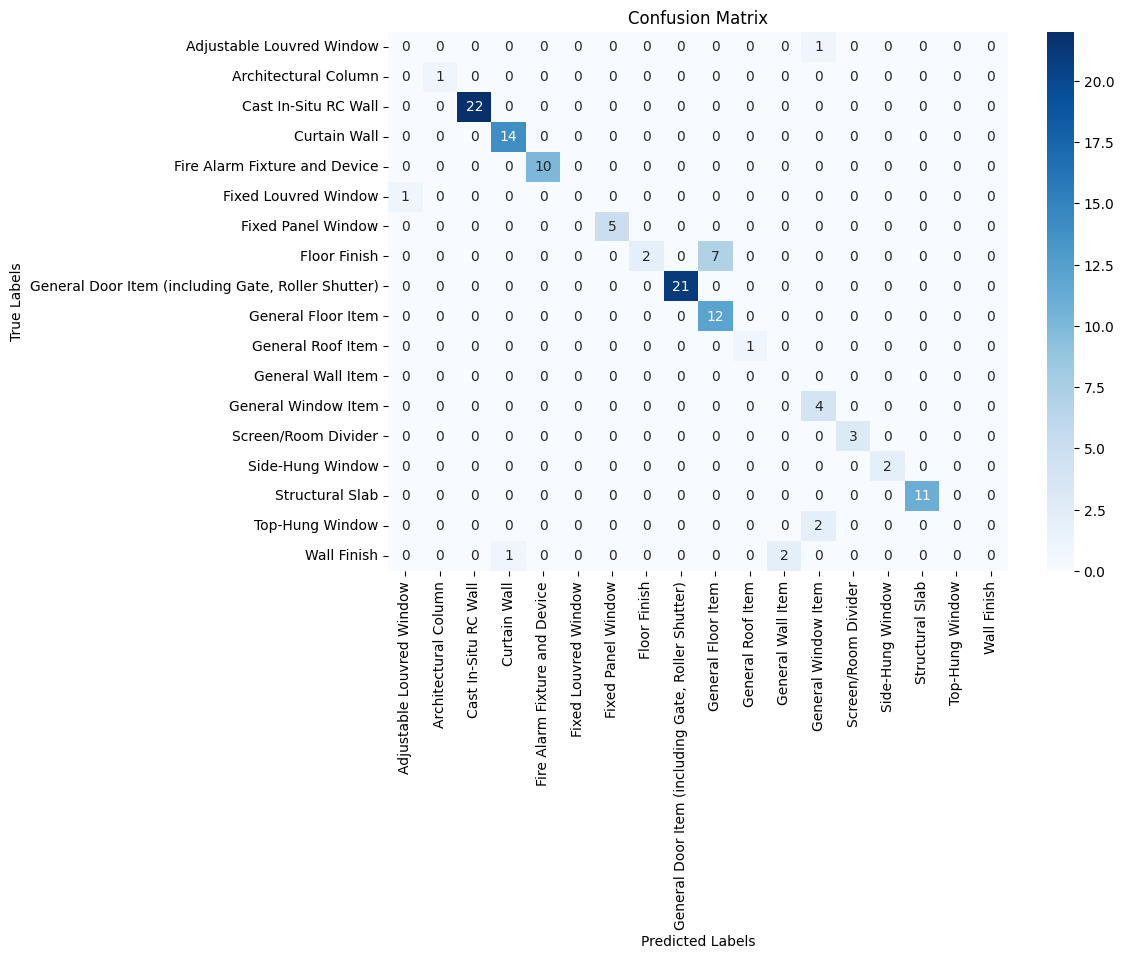

c:\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


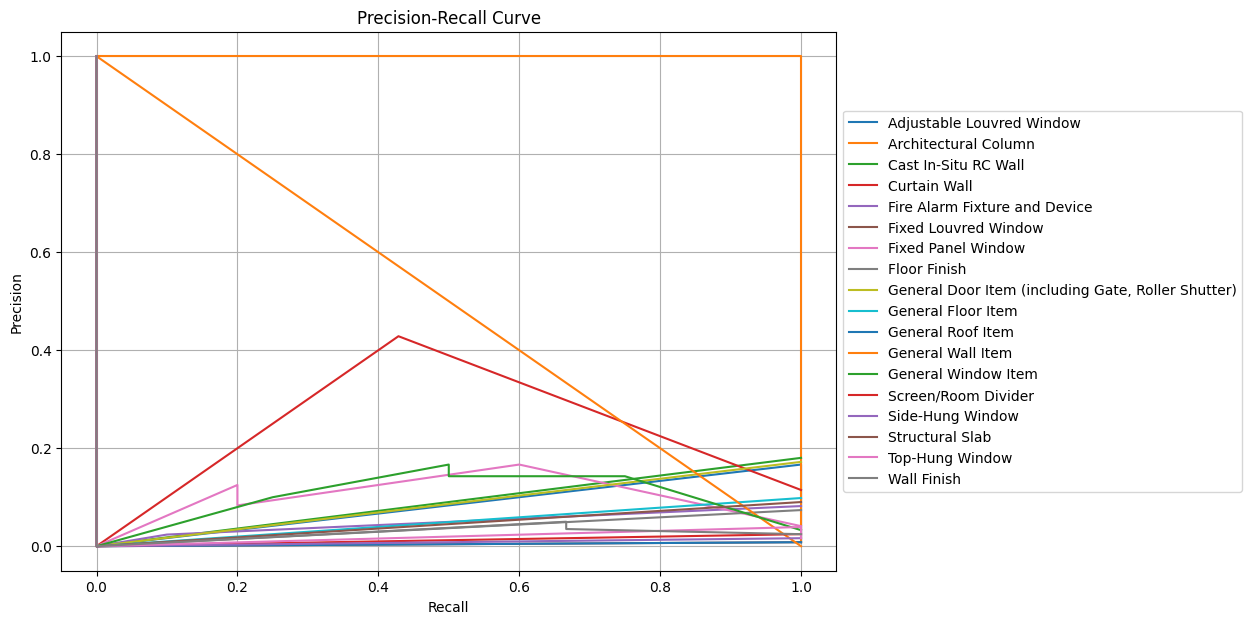

In [15]:
rf_classifier = joblib.load(model_filename)

# Load new data (example: assume `new_data.csv` has the same structure as `train_set.csv`)
new_data_file = "../datasets/test_set.csv"
new_df = pd.read_csv(new_data_file)

# Concatenate relevant text features
catFamily = new_df["Family"].fillna("*empty*")
catSubFamily = new_df["SubFamily"].fillna("*empty*")
catObjectGroup = new_df["ObjectGroup"].fillna("*empty*")
catObjectName = new_df["ObjectName"].fillna("*empty*")
catDescription = new_df["Description"].fillna("*empty*")
catTypeComments = new_df["Type Comments"].fillna("*empty*")
catStructuralMaterial = new_df["Structural Material"].fillna("*empty*")
catMaterial = new_df["Material"].fillna("*empty*")

new_df["Features"] = (
    catFamily
    + "|"
    + catSubFamily
    + "|"
    + catObjectGroup
    + "|"
    + catObjectName
    + "|"
    + catDescription
    + "|"
    + catTypeComments
    + "|"
    + catStructuralMaterial
    + "|"
    + catMaterial
)

# Vectorize text data using the same CountVectorizer instance
X_new_tfidf = vectorizer.transform(new_df["Features"])

# Predict using the loaded model
predictions_new = rf_classifier.predict(X_new_tfidf)

# Calculate accuracy
accuracy = accuracy_score(new_df["Category"], predictions_new)
print(f"Accuracy: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(new_df["Category"], predictions_new)

# Display classification report
print("\nClassification Report:")
class_report = classification_report(new_df["Category"], predictions_new)
print(class_report)

category_names = []
lines = class_report.splitlines()
for line in lines[2:-4]:  # Skip header and footer lines
    category_name = line.strip().split("       ")[0]
    category_names.append(category_name)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=category_names,
    yticklabels=category_names,  # Use the model's class labels
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Compute precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()

# Assuming predictions_new and new_df["Category"] are already defined

# Compute precision-recall curve for each class
for i, category_name in enumerate(category_names):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(
        (new_df["Category"] == category_name).astype(int),
        rf_classifier.predict_proba(X_new_tfidf)[:, i],
    )

# Plot recall curve
plt.figure(figsize=(10, 7))
for i, category_name in enumerate(category_names):
    plt.plot(recall[i], precision[i], label=f"{category_name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend to the right
plt.grid(True)
plt.show()